___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#### Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


renaming columns just for faster usage

In [4]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending'}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





- describe function illustrate the standard deviation, count of observations , and mean 
- we can observe that there is no missing values 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.shape

(200, 5)

check for duplicate values

In [9]:
df.duplicated().any()

False

- the image demonstrate the data distribution and we can see that in top right we have a clear 5 clusters between the customer and spending
- in the second row 4th column we can see that there is 2-4 clusters between age and spending
- in the third row 4th column we can see that we have 5 clusters between icome and spending

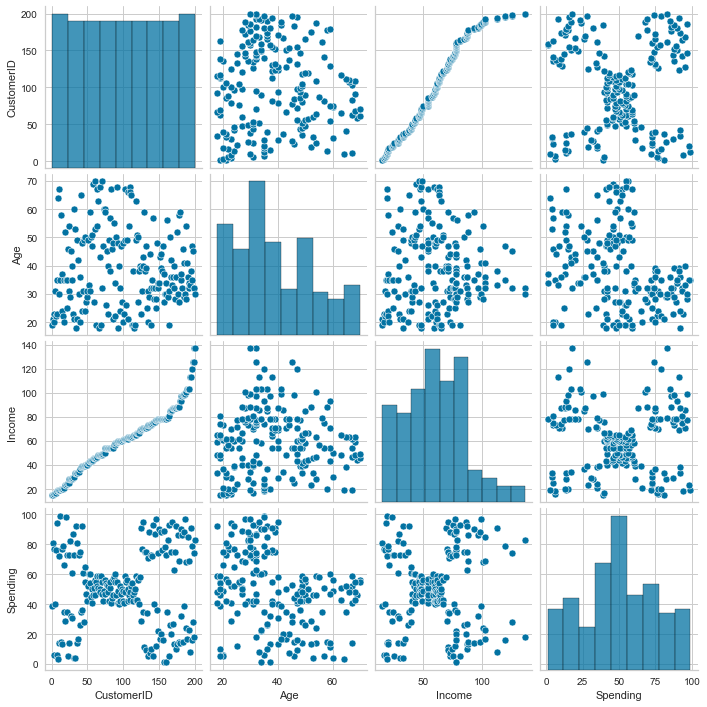

In [10]:
sns.pairplot(df)
plt.show()

- the heatmap shows the correlation matrix so we can see that we have high correlation between income and customer id 
- any ways we are not going to deal with the customer id since its unique for every observations and has no effect

<AxesSubplot:>

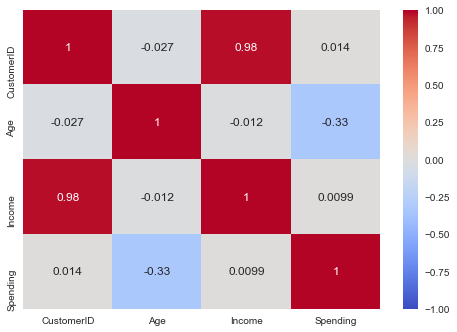

In [11]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap="coolwarm")

as we can see there is no outliers

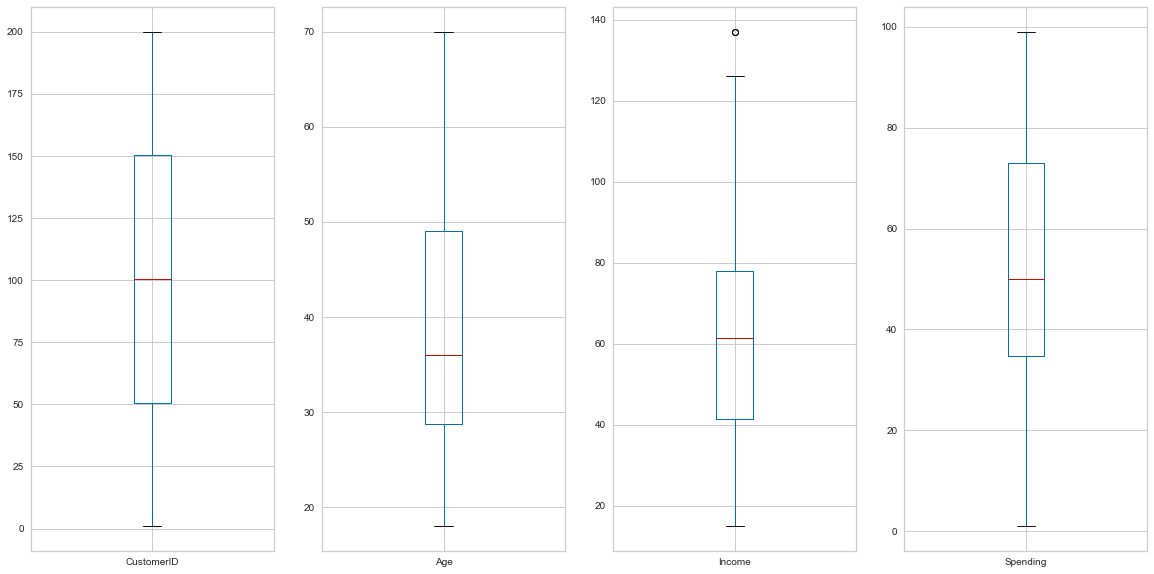

In [12]:
df.plot(kind='box',subplots=True, figsize=(20,10));

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [14]:
x1 = df[["Age","Spending"]]

In [15]:
x1.head()

,Age,Spending
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


there is 2-4 clusters between age and spending we will determine the best number later on 

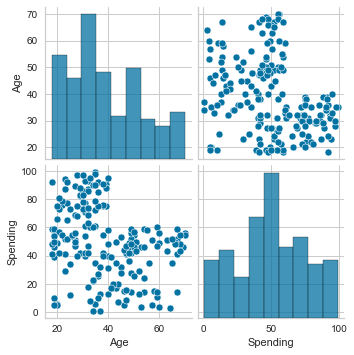

In [16]:
sns.pairplot(x1)

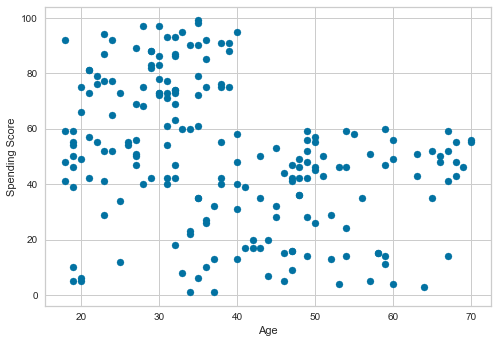

In [17]:
plt.scatter(x1['Age'], x1['Spending'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [18]:
x1.shape

(200, 2)

#### *ii. Determine optimal number of clusters*

In [19]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

by using hopkins we can see the data cluster tendancy so bigger value than 0.5 better tendancy

In [20]:
hopkins(x1, 1) # 1 means all the dataset

0.7008216457595767

In [21]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(x1)
    ssd.append(model.inertia_)

by using elbow method to plot the squared distance we can see than the best k value is 4 because there is no much different after k=4 and before k=4 the squared distance is too high

Text(0.5, 1.0, 'elbow method')

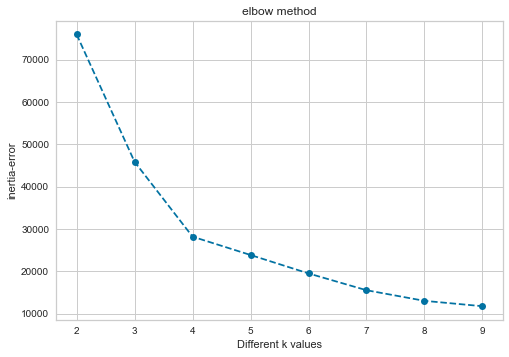

In [22]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [23]:
ssd # sum of squared distance

[75949.15601023019,
 45840.67661610868,
 28165.583566629342,
 23838.24882164619,
 19483.117910442703,
 15514.193134351028,
 13006.483628851021,
 11738.020296954508]

In [24]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
dtype: float64

In [25]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(x1)
    distances = kmeanModel.transform(x1) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

- by using elbow method to plot the disturtion we can see than the best k value is 4 because there is no much different after k=4 and before k=4 the disturtion is too high same as interia
- interia is : squared distance 
- disturtion is : sum of the mean squared distance

Text(0.5, 1.0, 'elbow method')

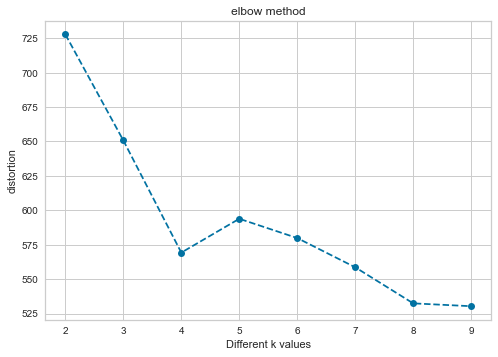

In [26]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

by computing the silhoutte score we can see that the best score is when k=4

In [27]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(x1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


###### By comparing interia, distortion, and sillhoutte we can see that the optimal k number is 4

### Why silhouette_score is negative?

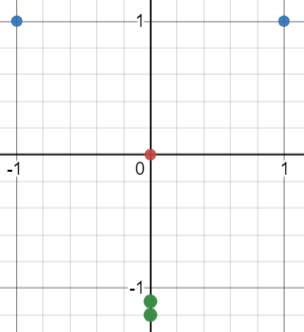

Negative score: if intra distance is heigh and inter distance is low

#### *iii. Apply K Means*

In [28]:
k_means = KMeans(n_clusters=4, random_state=42)
k_means.fit(x1)

KMeans(n_clusters=4, random_state=42)

In [29]:
silhouette_score(x1, k_means.labels_)

0.49973941540141753

#### *iv. Visualizing and Labeling All the Clusters*

as we can see the clusters Silhouette is above the mean Silhouette

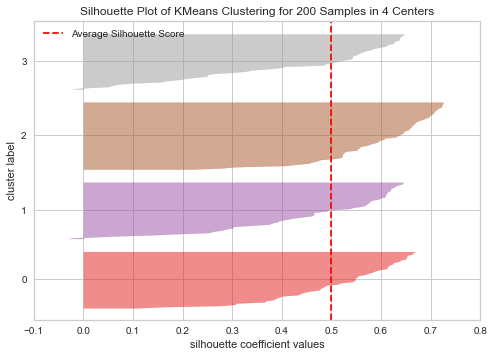

In [30]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(x1)    # Fit the data to the visualizer
visualizer.poof();

In [31]:
# average sillhoutte score foe each k
for i in range(4):
    label = (k_means.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


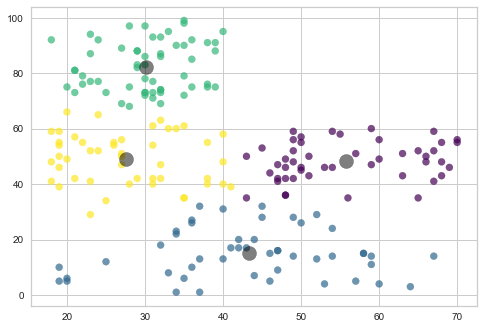

In [33]:
centers = k_means.cluster_centers_
x1temp = x1.copy()
x1temp['pred'] = k_means.labels_
plt.scatter(x1temp["Age"],
            x1temp["Spending"],
            c=x1temp['pred'],
            cmap="viridis",
            alpha =0.7)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

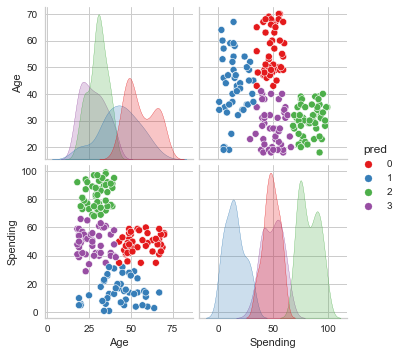

In [34]:
_ = sns.pairplot(x1temp, hue= 'pred', palette='Set1')

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [35]:
x2 = df[['Income','Spending']]
x2.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


from the below plot plot we can see that the data has 5 clusters

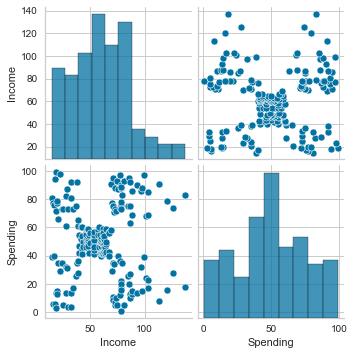

In [36]:
sns.pairplot(x2)

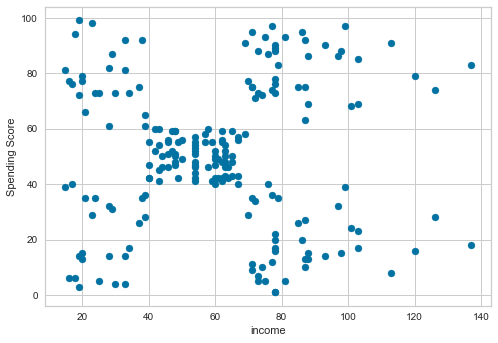

In [37]:
plt.scatter(x2['Income'], x2['Spending'])
plt.xlabel('income')
plt.ylabel('Spending Score')
plt.show()

In [38]:
x2.shape

(200, 2)

#### *ii. Determine optimal number of clusters*

In [39]:
hopkins(x2, 1)

0.7001648782275665

In [40]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(x2)
    ssd.append(model.inertia_)

by using elbow method to plot the squared distance we can see than the best k value is 5 because there is no much different after k=5 and before k=4 the squared distance is too high

Text(0.5, 1.0, 'elbow method')

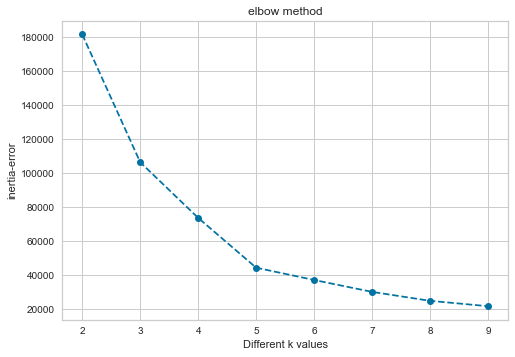

In [41]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [42]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3161.674067
dtype: float64

In [43]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(x2)
    distances = kmeanModel.transform(x2)# distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

- by using elbow method to plot the disturtion we can see than the best k value is 5 because there is no much different after k=4 and before k=5 the disturtion is too high same as interia

Text(0.5, 1.0, 'elbow method')

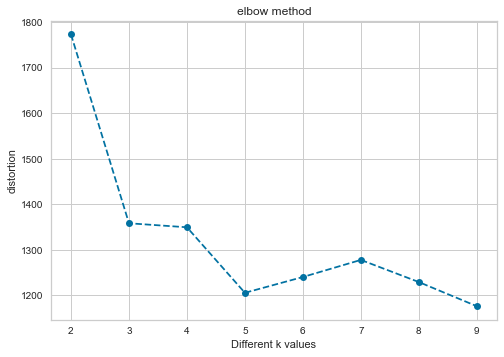

In [44]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

the best silhoutte score is when k=5

In [45]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(x2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


###### By comparing interia, distortion, and sillhoutte we can see that the optimal k number is 5

#### *iii. Apply K Means*

In [46]:
K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit(x2)

KMeans(n_clusters=5, random_state=42)

In [47]:
silhouette_score(x2, K_means_model.labels_)

0.553931997444648

#### *iv. Visualizing and Labeling All the Clusters*

as we can see the clusters Silhouette is above the mean Silhouette

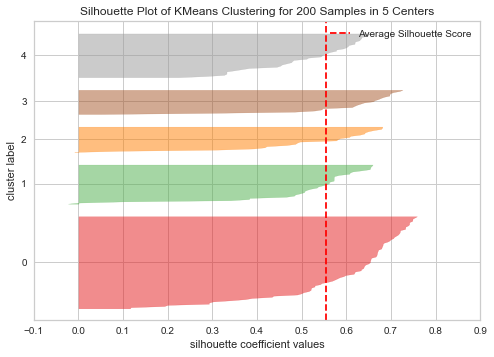

In [48]:
visualizer = SilhouetteVisualizer(K_means_model)
visualizer.fit(x2)    # Fit the data to the visualizer
visualizer.poof();

In [49]:
# average sillhoutte score foe each k
for i in range(5):
    label = (K_means_model.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5122676140736505
mean silhouette score for label 3    : 0.5990128687006722
mean silhouette score for label 4    : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


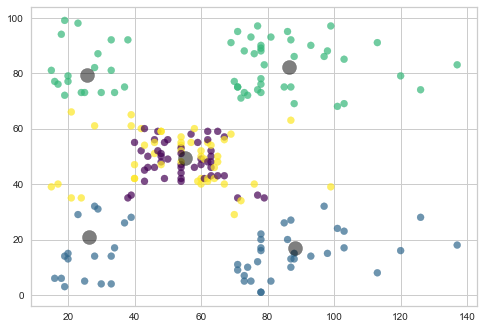

In [51]:
centers = K_means_model.cluster_centers_
x2temp = x2.copy()
x2temp['pred'] = K_means_model.labels_
plt.scatter(x2temp["Income"],
            x2temp["Spending"],
            c=x1temp['pred'],
            cmap="viridis",
            alpha =0.7)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

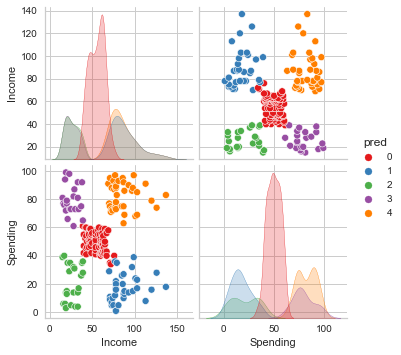

In [52]:
_ = sns.pairplot(x2temp, hue= 'pred', palette='Set1')

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [53]:
hopkins(x1, 1)

0.687768337414151

In [54]:
hopkins(MinMaxScaler().fit_transform(x1), 1) 

0.6776879838827068

In [55]:
hopkins(StandardScaler().fit_transform(x1), 1)

0.7158068944237492

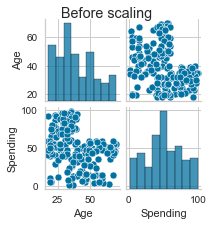

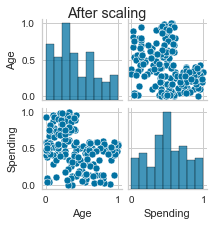

In [56]:
g = sns.pairplot(x1, size=1.5)
_ = g.fig.suptitle("Before scaling", y=1.02)

g = sns.pairplot(pd.DataFrame(MinMaxScaler().fit_transform(x1), columns=x1.columns), size=1.5)
_ = g.fig.suptitle("After scaling", y=1.02)

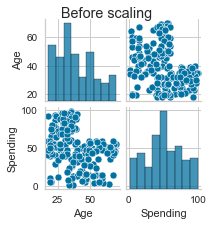

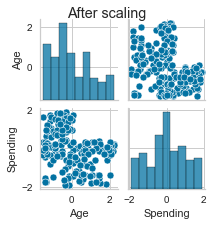

In [57]:
g = sns.pairplot(x1, size=1.5)
_ = g.fig.suptitle("Before scaling", y=1.02)

g = sns.pairplot(pd.DataFrame(StandardScaler().fit_transform(x1), columns=x1.columns), size=1.5)
_ = g.fig.suptitle("After scaling", y=1.02)

##### As we can see the scalers make no change for the data 

In [58]:
hc_ward = linkage(y=x1, method="ward")
hc_complete = linkage(x1, "complete")
hc_average = linkage(x1, "average")
hc_single = linkage(x1, "single")

we can interpre from the below dendrogram that the best k value is 4

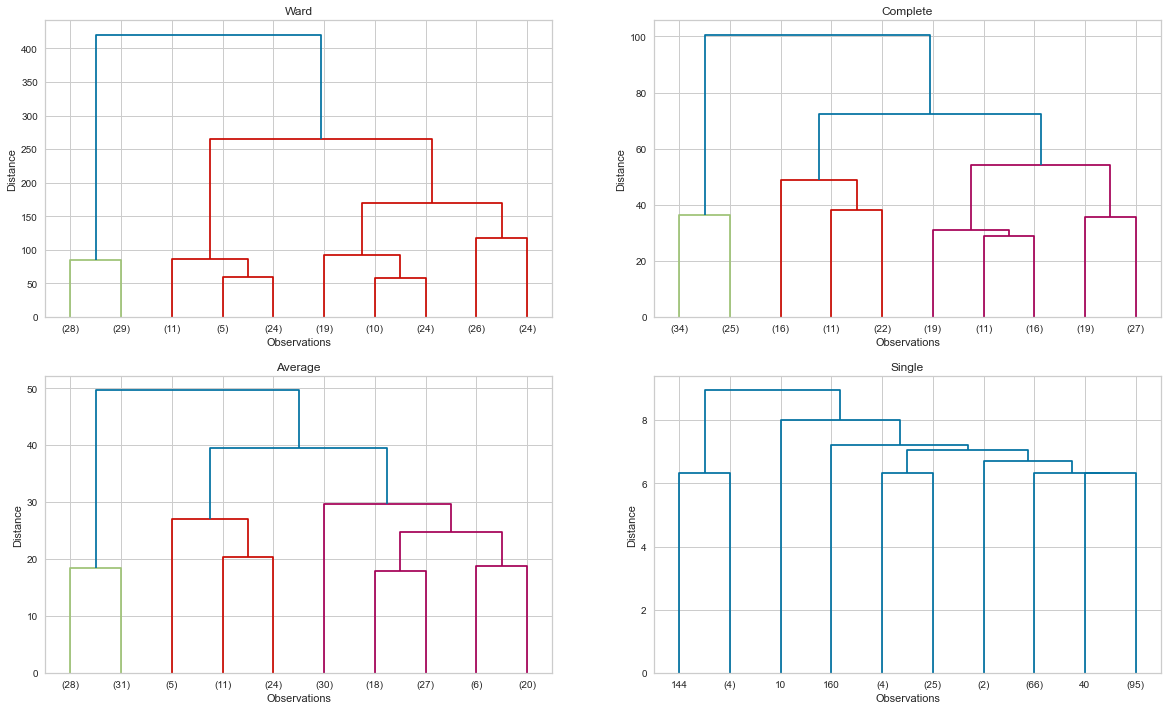

In [59]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

###### As we can see the best K value is 4

## Clustering based on Annual Income and Spending Score- x2

In [60]:
hopkins(x2, 1)

0.7108317424522491

In [61]:
hopkins(MinMaxScaler().fit_transform(x2), 1) 

0.7117573495128621

In [62]:
hopkins(StandardScaler().fit_transform(x2), 1)

0.6980840161713521

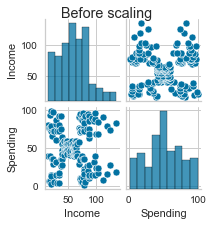

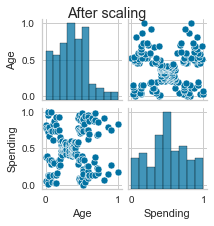

In [63]:
g = sns.pairplot(x2, size=1.5)
_ = g.fig.suptitle("Before scaling", y=1.02)

g = sns.pairplot(pd.DataFrame(MinMaxScaler().fit_transform(x2), columns=x1.columns), size=1.5)
_ = g.fig.suptitle("After scaling", y=1.02)

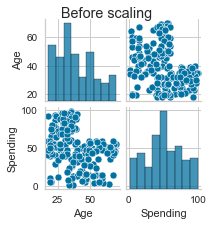

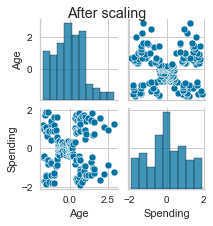

In [64]:
g = sns.pairplot(x1, size=1.5)
_ = g.fig.suptitle("Before scaling", y=1.02)

g = sns.pairplot(pd.DataFrame(StandardScaler().fit_transform(x2), columns=x1.columns), size=1.5)
_ = g.fig.suptitle("After scaling", y=1.02)

##### As we can see the minmax scaler makes the data density better for clustring 

In [65]:
x2_scaled = MinMaxScaler().fit_transform(x2)

In [66]:
scaled_x2_ward = linkage(y=x2_scaled, method="ward")
scaled_x2_complete = linkage(x2_scaled, "complete")
scaled_x2_average = linkage(x2_scaled, "average")
scaled_x2_single = linkage(x2_scaled, "single")

we can interpre from the below dendrogram that the best k value is 5

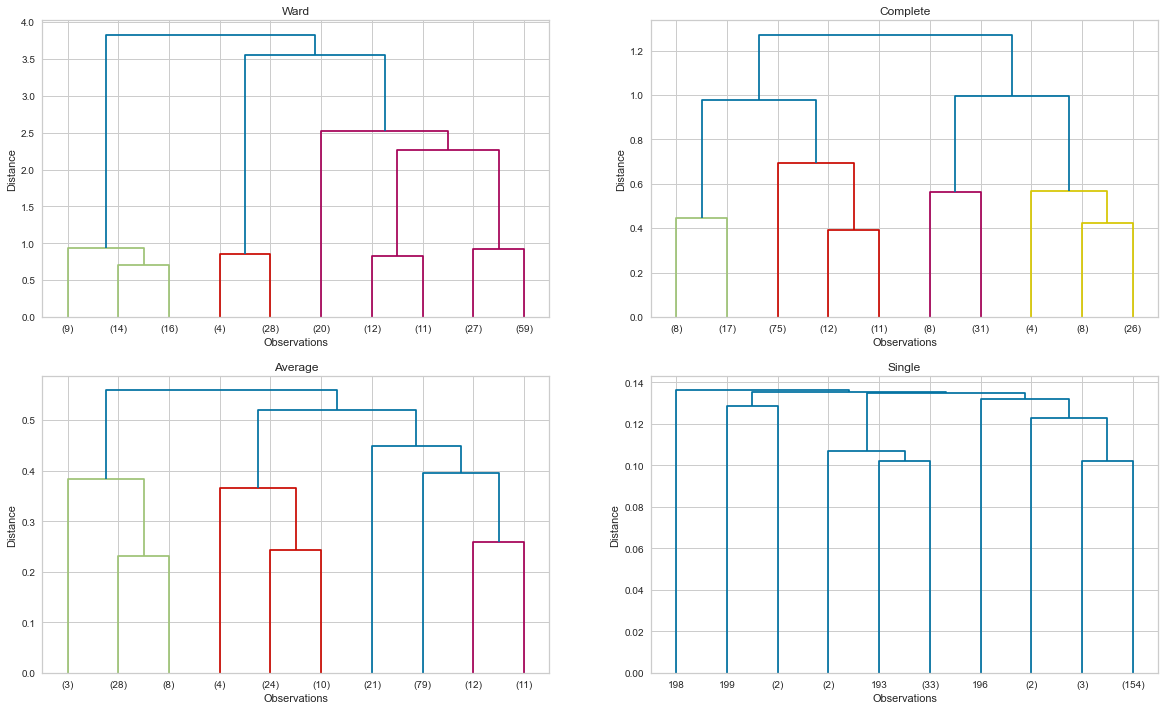

In [67]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(scaled_x2_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(scaled_x2_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(scaled_x2_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(scaled_x2_single, leaf_font_size=10, truncate_mode='lastp', p=10);

###### As we can see the best K value is 5

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [68]:
K = range(2,10)

for k in K:
    model_x1 = AgglomerativeClustering(n_clusters=k)
    model_x1.fit_predict(x1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(x1, model_x1.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


- As we can see the best K value is 4

In [69]:
model_x1 = AgglomerativeClustering(n_clusters=4)
model_x1.fit_predict(x1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

#### Annual Income and Spending Score- x2

In [70]:
K = range(2,10)

for k in K:
    model_x2 = AgglomerativeClustering(n_clusters=k)
    model_x2.fit_predict(x2_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(x2_scaled, model_x2.labels_)}')

Silhouette Score for 2 clusters: 0.39090074716611595
Silhouette Score for 3 clusters: 0.44796167261691394
Silhouette Score for 4 clusters: 0.4976418539903167
Silhouette Score for 5 clusters: 0.5582698727196419
Silhouette Score for 6 clusters: 0.5296670434232814
Silhouette Score for 7 clusters: 0.409308025869031
Silhouette Score for 8 clusters: 0.41055127971395405
Silhouette Score for 9 clusters: 0.4177210331066167


- As we can see the best K value is 5

In [71]:
model_x2 = AgglomerativeClustering(n_clusters=5)
model_x2.fit_predict(x2_scaled)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

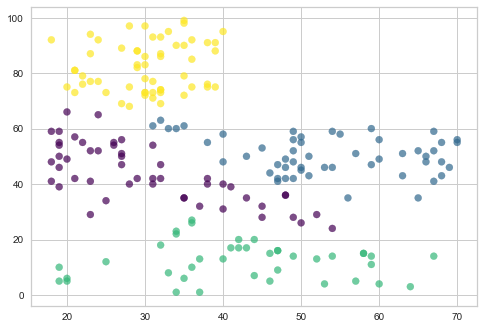

In [72]:
plt.scatter(x1["Age"],
            x1["Spending"],
            c=model_x1.labels_,
            cmap="viridis",
            alpha=0.7)

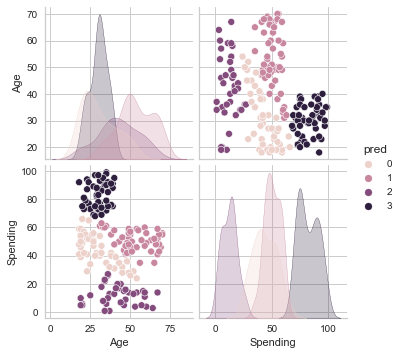

In [75]:
temp_x1 = x1.copy()
temp_x1['pred']=model_x1.labels_
_ = sns.pairplot(temp_x1, hue= 'pred')

#### Annual Income and Spending Score- x2

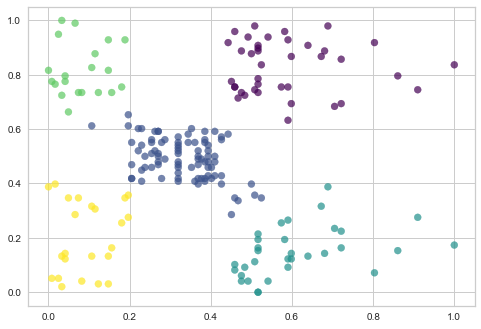

In [79]:
temp_x1['pred']=model_x1.labels_
x2_scale_pd = pd.DataFrame(x2_scaled,columns=['Income','Spending'])
plt.scatter(x2_scale_pd["Income"],
            x2_scale_pd["Spending"],
            c=model_x2.labels_,
            cmap="viridis",
            alpha=0.7)

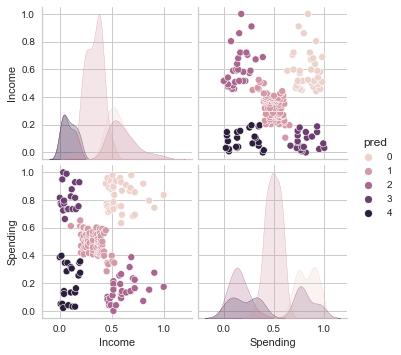

In [81]:
temp_x2 = x2_scale_pd.copy()
temp_x2['pred']=model_x2.labels_
_ = sns.pairplot(temp_x2, hue= 'pred')

#### Interpretation based on Age and Spending Score- x1

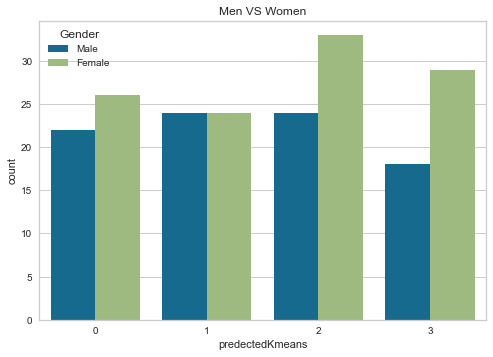

In [83]:
temp_df = df.copy()
temp_df['predectedKmeans'] = k_means.fit_predict(x1)
plt.title("Men VS Women")
plt.ylabel("Count")
ax =sns.countplot(x=temp_df['predectedKmeans'], hue=temp_df['Gender'])


- As we can see the clusters 0, 2, and 3 has more females rather than males
- cluster 0 : The ages are range between 45-70 and their spending is moderate
- cluster 1 : The ages are range between 35-55 and their spending is low
- cluster 2 : The ages are range between 20-35 and their spending is high
- cluster 3 : The ages are range between 15-25 and their spending is moderate

- we can say that young and middle age are spending more 

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

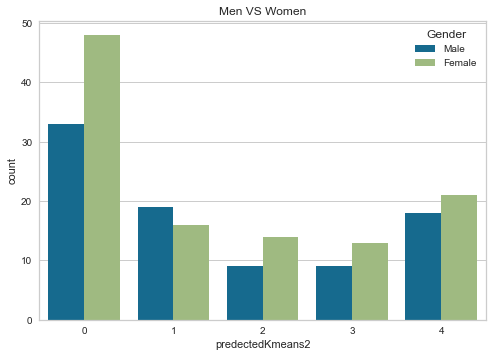

In [84]:
temp_df['predectedKmeans2'] = K_means_model.fit_predict(x2)
plt.title("Men VS Women")
plt.ylabel("Count")
ax =sns.countplot(x=temp_df['predectedKmeans2'], hue=temp_df['Gender'])


- As we can see the clusters 0, 2, 3, and 4 has more females rather than males
- cluster 0 : The income is range between 40-65 and their spending is moderate
- cluster 1 : The income is range between 65-100 and their spending is low
- cluster 2 : The income is range between 20-40 and their spending is low
- cluster 3 : The income is range between 20-40 and their spending is high
- cluster 4 : The income is range between 65-100 and their spending is high

- we can say that most of women are spending more than men
- we can say that most of men are getting more income than women


## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___